In [80]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
import seaborn as sns
import math

# Генерируем выборку n = 25

In [81]:
Xn = []
N = 25

for i in range (N):
    Xn.append (round (np.random.exponential (1), 2))

Xn_s = np.sort (Xn)

print ("Сгенерированная выборка: ")
print (Xn)
print ("Вариационный ряд: ")
print (Xn_s)

Сгенерированная выборка: 
[0.34, 1.77, 0.92, 0.66, 0.12, 0.48, 3.35, 1.18, 2.25, 0.12, 3.38, 0.86, 1.69, 0.2, 0.23, 1.51, 0.19, 0.94, 2.49, 0.18, 0.95, 0.47, 0.38, 2.83, 0.21]
Вариационный ряд: 
[0.12 0.12 0.18 0.19 0.2  0.21 0.23 0.34 0.38 0.47 0.48 0.66 0.86 0.92
 0.94 0.95 1.18 1.51 1.69 1.77 2.25 2.49 2.83 3.35 3.38]


# а) Определить моду, медиану, размах, коэффициент асимметрии

In [82]:
median = Xn_s[12]
scope = Xn_s[N - 1] - Xn_s[0]

print ("Медиана: ", median)
print ("Размах: ", scope)
print ("Мода: ", Xn_s)

a1 = np.mean (Xn)
m2, m3 = 0, 0

for xi in Xn:
    m2 += ((xi - a1) ** 2) / N
    m3 += ((xi - a1) ** 3) / N
gamma = m3 / ((m2) ** (3/2))

print ("Коэффициент ассиметрии: ", gamma)

Медиана:  0.86
Размах:  3.26
Мода:  [0.12 0.12 0.18 0.19 0.2  0.21 0.23 0.34 0.38 0.47 0.48 0.66 0.86 0.92
 0.94 0.95 1.18 1.51 1.69 1.77 2.25 2.49 2.83 3.35 3.38]
Коэффициент ассиметрии:  0.9884005146943255


# б) Построить эмпирическую функцию распределения и гистограмму и boxplot

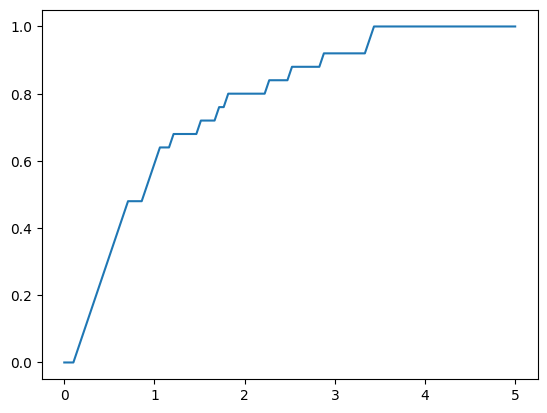

In [83]:
# Эмпирическая
x_tmp = np.linspace (0, 5, 100)

nu = []
it = 0
for x in x_tmp:
    if (it < N and x > Xn_s[it]):
        it += 1
    nu.append (it / N)

plt.plot (x_tmp, nu)

(array([1.10429448, 0.36809816, 0.49079755, 0.12269939, 0.24539877,
        0.12269939, 0.12269939, 0.12269939, 0.12269939, 0.24539877]),
 array([0.12 , 0.446, 0.772, 1.098, 1.424, 1.75 , 2.076, 2.402, 2.728,
        3.054, 3.38 ]),
 <BarContainer object of 10 artists>)

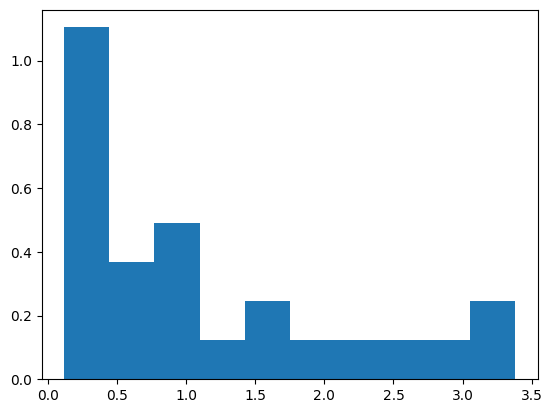

In [84]:
# Гистограмма
plt.hist (Xn, density = True, histtype = 'bar')

x25:  0.22
x75:  1.73
xmin:  0.12
xmax:  3.38
Выбросы: 


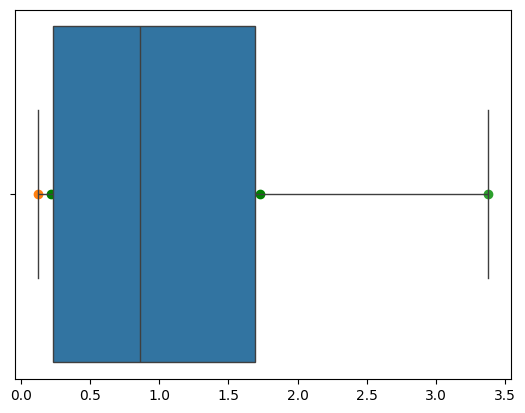

In [85]:
sns.boxplot (Xn_s, orient = 'h')

x25 = (Xn_s[5] + Xn_s[6]) / 2
x75 = (Xn_s[18] + Xn_s[19]) / 2
xmin = Xn_s[0]
xmax = Xn_s[24]

print ("x25: ", x25)
print ("x75: ", x75)
print ("xmin: ", xmin)
print ("xmax: ", xmax)

e = x75 - x25
print ("Выбросы: ")
for x in Xn_s:
    if (x < x25 - 1.5 * e or x > x75 + 1.5 * e):
        print (x)
        plt.scatter (x, 0, c = 'red')
plt.scatter (x25, 0, c = 'green')
plt.scatter (x75, 0, c = 'green')
plt.scatter (xmin, 0)
plt.scatter (xmax, 0)

# в) Найти ядерную оценку плотности

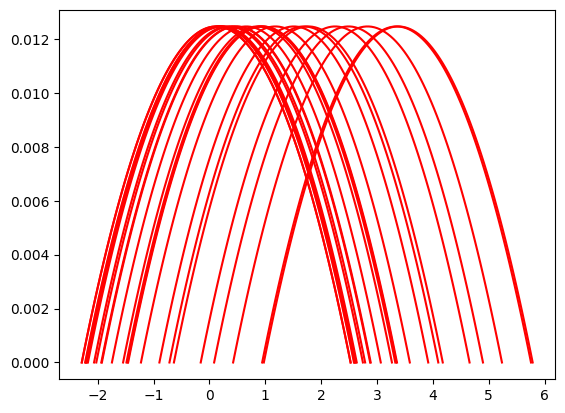

In [89]:
s = math.sqrt (m2 * N / (N - 1))
h = 2.344 * (s / math.pow (s, 1/5))

yadro = []
for x in Xn_s:
    x_U = np.linspace (x - h, x + h, 100)
    yadro_i = (3 / (4 * N * h)) * ( 1 - ((x_U - x) / h) ** 2 )
    yadro.append (yadro_i)
    plt.plot (x_U, yadro_i, c = 'red')

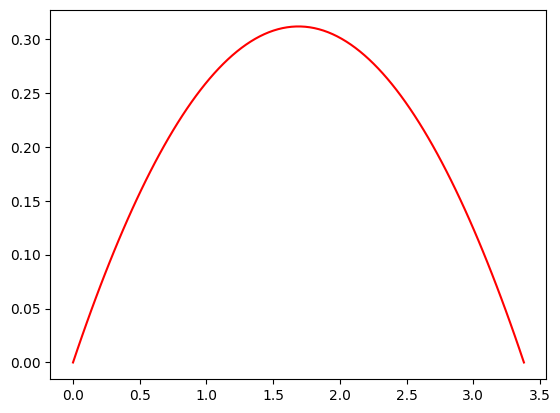

In [91]:
yadro_sum = np.sum (yadro, axis=0)
plt.plot (np.linspace (0, Xn_s[N - 1], 100), yadro_sum, c = 'red')

# Плотность распределения среднего арифметического элементов выборки

Первый момент:  1.108
Второй момент:  2.253328


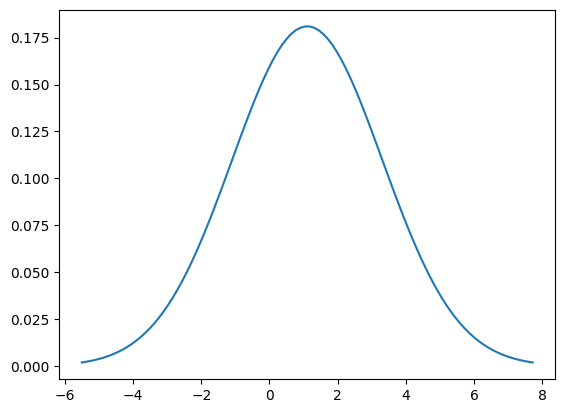

In [98]:
print ("Первый момент: ", a1)

a2 = 0
for x in Xn:
    a2 += (x)**2 / N
print ("Второй момент: ", a2)

mu = a1
sigma = a2 - a1**2 / N

X_norm = np.linspace (mu - 3 * sigma, mu + 3 * sigma, 100)
Y_norm = stats.norm.pdf (X_norm, mu, sigma)

plt.plot (X_norm, Y_norm)

(array([0.10447184, 0.5786133 , 1.20544437, 1.68762211, 2.0894369 ,
        1.38224287, 0.61075848, 0.26519776, 0.08839925, 0.01607259]),
 array([0.5844 , 0.70896, 0.83352, 0.95808, 1.08264, 1.2072 , 1.33176,
        1.45632, 1.58088, 1.70544, 1.83   ]),
 <BarContainer object of 10 artists>)

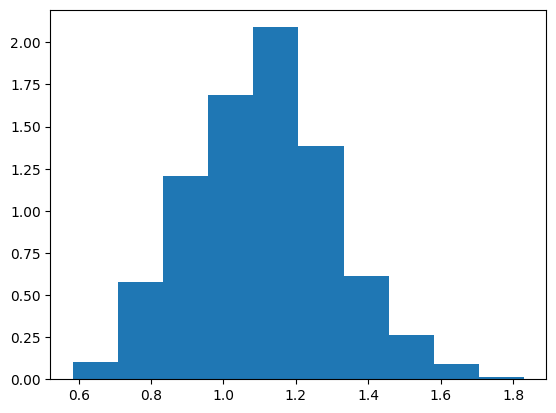

In [104]:
boot_ar = []
for i in range (1, 1000):
    xn_random = np.random.choice (Xn, size = N)
    boot_ar.append (np.mean (xn_random))
plt.hist (boot_ar, density=True, histtype='bar')

# Bootstrap оценка плотности распределения коэффициента асимметрии

(array([0.00357246, 0.04644192, 0.14647066, 0.23220958, 0.3179485 ,
        0.47156407, 0.62517964, 0.75021557, 0.6287521 , 0.3501006 ]),
 array([-0.90687608, -0.62695654, -0.34703699, -0.06711745,  0.21280209,
         0.49272163,  0.77264118,  1.05256072,  1.33248026,  1.61239981,
         1.89231935]),
 <BarContainer object of 10 artists>)

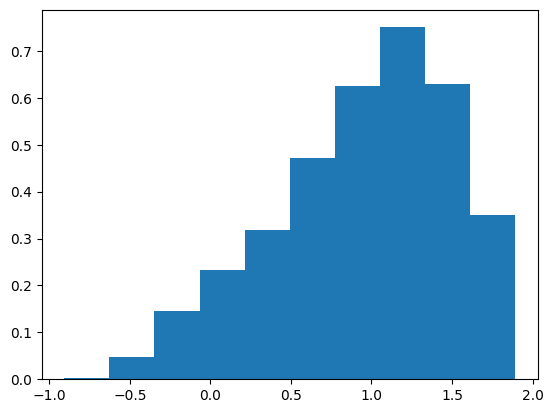

In [107]:
boot_r = []
for i in range (1000):
    xn_random = np.random.choice (Xn, size = N)
    boot_mean = np.mean (xn_random)
    
    m2 = 0
    m3 = 0
    for x in Xn:
        m2 += ((x - boot_mean) ** 2) / N
        m3 += ((x - boot_mean) ** 3) / N
    
    boot_i = m3 / (m2 ** (3/2))
    boot_r.append (boot_i)
plt.hist (boot_r, density=True, histtype='bar')